# Lab CMBLenses

## Model

In [1]:
using CMBLensing, CMBLensingInferenceTestProblem
using CUDA, LaTeXStrings, MCMCDiagnosticTools, Plots, ProgressMeter, Random, Zygote
using LinearAlgebra, Statistics
ENV["LINES"] = 10;

In [2]:
using Revise
using MicroCanonicalHMC

[ Info: Precompiling MicroCanonicalHMC [234d2aa0-2291-45f7-9047-6fa6f316b0a8]


In [3]:
prob = load_cmb_lensing_problem(storage = Array,
                                T = Float32,
                                Nside = 64);

In [4]:
target = CMBLensingTarget(prob);

In [5]:
d = length(prob.Ωstart[:])
to_vec, from_vec = CMBLensingInferenceTestProblem.to_from_vec(prob.Ωstart)

(CMBLensingInferenceTestProblem.var"#to_vec#2"(), CMBLensingInferenceTestProblem.var"#from_vec#3"{Field-(f°,ϕ°,θ)-Tuple{LambertQUMap{Array{Float32, 3}}, LambertMap{Array{Float32, 2}}, ComponentArrays.ComponentVector{Float32, Vector{Float32}, Tuple{ComponentArrays.Axis{(r = 1, Aϕ = 2)}}}}}(Float32[-4.7993712, -10.132681, -13.010162, -9.098768, -3.4189508, -2.647602, -2.2184951, -1.8052056, -3.8572881, -6.549067  …  -1.4671382f-6, -1.5210153f-6, -1.5569877f-6, -1.597326f-6, -1.6578678f-6, -1.7366059f-6, -1.8154062f-6, -1.8714119f-6, -1.609438, 0.0]))

## Sample

In [6]:
#spl=MCHMC(10.0, 10.0*sqrt(50); sigma=one(LenseBasis(diag(target.Λmass))))
spl = MCHMC(100, 0.0001;  adaptive=true, init_eps=10.0, init_L=10.0*sqrt(50), sigma=one(LenseBasis(diag(target.Λmass))))

MicroCanonicalHMC.Sampler(Settings(100, 0.0001, 1, true, "LF", 10.0, 70.71067811865476, nothing), Hyperparameters{Field-(f°,ϕ°,θ)-Tuple{LambertQUMap{Array{Float32, 3}}, LambertMap{Array{Float32, 2}}, ComponentArrays.ComponentVector{Float32, Vector{Float32}, Tuple{ComponentArrays.Axis{(r = 1, Aϕ = 2)}}}}}(0.0, 0.0, 0.0, 0.1931833275037836, Float32[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 0.9607843137254902, 1.5), MicroCanonicalHMC.Leapfrog)

In [ ]:
@time samples = Sample(spl, target, 100; dialog=false)

[ Info: Tuning eps ⏳
[ Info: Tuning L ⏳


In [ ]:
samples_redux = []
for sample in samples
    if all(isfinite.(sample))
            append!(samples_redux, [sample])
    end
end    

In [ ]:
_samples = zeros(length(samples), length(samples[1]), 1)
_samples[:, :, 1] = mapreduce(permutedims, vcat, samples)
_samples = permutedims(_samples, (1,3,2))
ess, rhat = MCMCDiagnosticTools.ess_rhat(_samples)

In [ ]:
_ess = mean(ess)

In [ ]:
1/(9.4/226)

In [ ]:
_rhat = median(rhat)

## Plotting

In [30]:
Plots.default(fmt=:png, dpi=120, size=(500,300), legendfontsize=10)

In [31]:
rs = [sample[1:d][end-1] for sample in samples_redux]
Aϕs = [sample[1:d][end] for sample in samples_redux];

In [32]:
p_rs = [sample[d:2d][end-1] for sample in samples_redux]
p_Aϕs = [sample[d:2d][end] for sample in samples_redux];

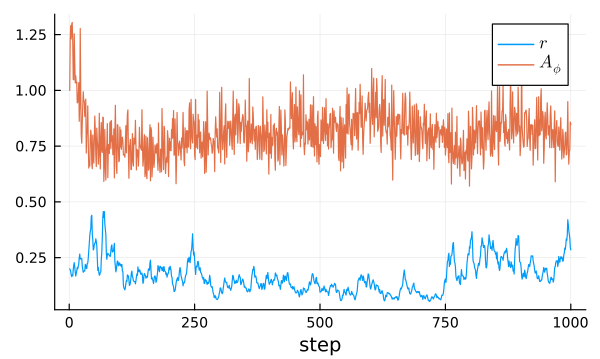

In [33]:
plot(exp.(rs), label=L"r", xlabel="step")
plot!(exp.(Aϕs), label=L"A_\phi")


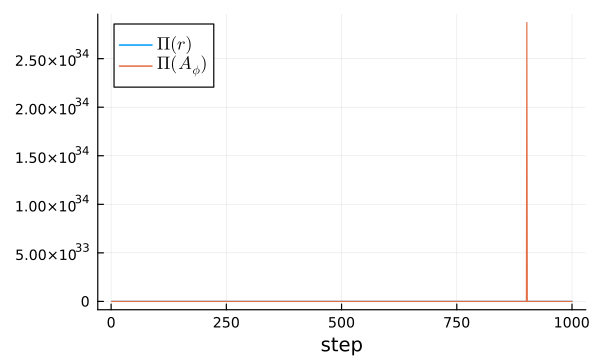

In [34]:
plot(exp.(p_rs), label=L"\Pi(r)", xlabel="step")
plot!(exp.(p_Aϕs), label=L"\Pi(A_\phi)")


In [35]:
Energy = [sample[end-1] for sample in samples_redux];
std(Energy)^2/d

0.00010689130672028287

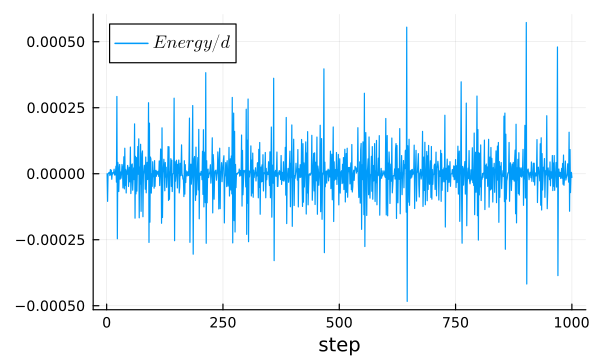

In [36]:
plot(Energy/d, label=L"Energy/d", xlabel="step")

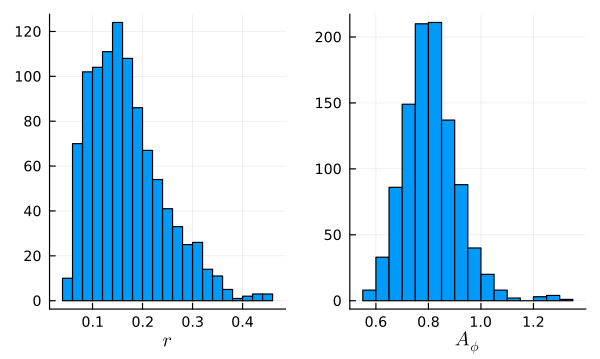

In [37]:
plot(histogram(exp.(rs), xlabel=L"r", label=nothing, lw=1),
    histogram(exp.(Aϕs), xlabel=L"A_\phi", label=nothing, lw=1))

In [38]:
to_vec, from_vec = CMBLensingInferenceTestProblem.to_from_vec(prob.Ωstart)
last_sample = from_vec(samples[end][1:end-2])

12290-element Field-(f°,ϕ°,θ)-Tuple{LambertQUMap{Array{Float64, 3}}, LambertMap{Array{Float64, 2}}, ComponentArrays.ComponentVector{Float32, Vector{Float32}, Tuple{ComponentArrays.Axis{(r = 1, Aϕ = 2)}}}}:
  -4.936826132762137
 -10.548151783311656
 -13.327145165216542
   ⋮
  -1.255732774734497
  -0.16520963609218597

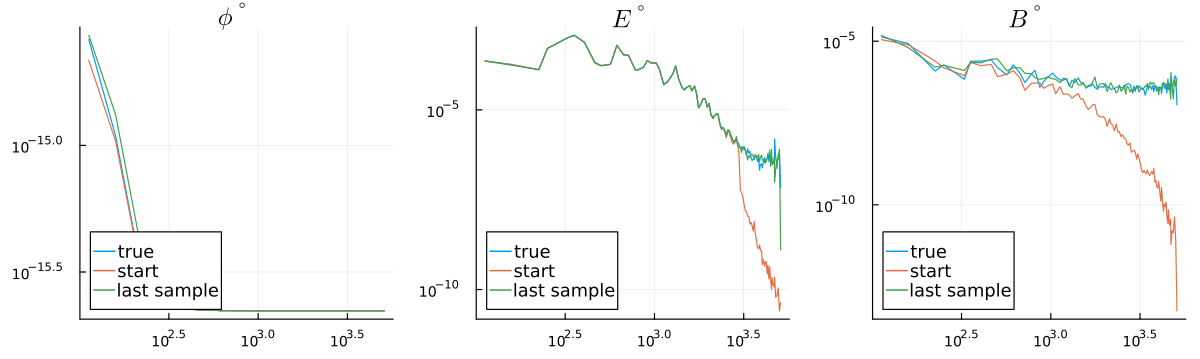

GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27
GKS: glyph missing from current font: 27


In [39]:
ps = map([(:ϕ°,:I,L"L",L"\phi^\circ"), (:f°,:E,"L\ell",L"E^\circ"), (:f°,:B,L"\ell",L"B^\circ")]) do (k1, k2, xlabel, title)
    plot(get_Cℓ(prob.Ωtrue[k1][k2]); label="true", xlabel, title)
    plot!(get_Cℓ(prob.Ωstart[k1][k2]); label="start", xlabel, title)
    plot!(get_Cℓ(last_sample[k1][k2]); label="last sample", xlabel, title)
end
plot(ps..., layout=(1,3), xscale=:log10, yscale=:log10, size=(1000,300), legend=:bottomleft)

In [40]:
samps = [∇²*from_vec(sample[1:end-2]).ϕ°/2 for sample in samples[100:end]]
anim = @animate for i in 1:length(samps)
    motionblur = [0.5, 1, 0.5]
    frame = sum(circshift(samps, i)[1:length(motionblur)] .* motionblur) / sum(motionblur)
    plot(1 * frame, clims=(-0.5, 0.5), c=:thermal, title="κ samples")
end;

In [23]:
mp4(anim, "kappa_samples.mp4", fps = 25)

[ Info: Saved animation to /home/jaimerz/Glamdring/MicroCanonicalHMC.jl/examples/kappa_samples.mp4


Plots.AnimatedGif("/home/jaimerz/Glamdring/MicroCanonicalHMC.jl/examples/kappa_samples.mp4")